# Open Data Publication Example Using Yue Dataset

Steps:
- Create data folder (check to create the folder if it does not exist)
- Download data from web to the folder (if the file was not downloaded before)
- Read the data using Pandas

In [95]:
!pip install pyDataverse
!pip install matplotlib
!pip install gdal
!pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


# Download Data

first we create a data folder

In [96]:
import os
path = "data"
if not os.path.exists(path):
  os.makedirs(path)
  print(f"{path} directory was created!")

Download data to the folder

In [97]:
from pyDataverse.api import NativeApi, DataAccessApi
from pyDataverse.models import Dataverse

Base_url = 'https://dataverse.nl/'

Api = NativeApi(Base_url)
Data_Api = DataAccessApi(Base_url)

DOI = "doi:10.34894/XNC5KA"
Dataset = Api.get_dataset(DOI) 

files_list = Dataset.json()['data']['latestVersion']['files']

for file in files_list:
    filename = file["dataFile"]["filename"]
    file_id = file["dataFile"]["id"]
    print("File name {}, id {}".format(filename, file_id))

    response = Data_Api.get_datafile(file_id)
    with open(os.path.join(path, filename), "wb") as f:
        f.write(response.content)

File name EU_landSystem.clr, id 50265
File name EU_landSystem_ReadMe.txt, id 50262
File name EU_landSystem.tif, id 50264
File name EU_landSystem.tif.lyr, id 50263


# Read and show the files

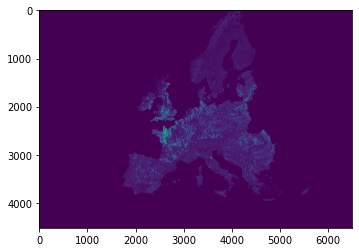

In [98]:


import matplotlib.pyplot as plt
rf = plt.imread(os.path.join(path, "EU_landSystem.tif"))
plt.imshow(rf)

# Provide the colormap

In [99]:
import rasterio
import csv
import os.path
import sys
import numpy as np


def get_colormap(fn):
    if not os.path.exists(fn):
        raise IOError("File not found!")
    with open(fn, "r") as cf:
        colormgr = csv.reader(cf, delimiter=' ')
        result = {}
        for row in colormgr:
            color = tuple([int(row[1]), int(row[2]), int(row[3])])
            result[int(row[0])] = color
    return result


with rasterio.open(os.path.join(path, "EU_landSystem.tif")) as rf:
    # Retrieve some particulars of the input file
    data = rf.read(1)
    meta = rf.meta

    # Get the color map
    cmap = get_colormap(os.path.join(path, "EU_landSystem.clr"))
    cmap[255] = (255, 255, 255)
    
    meta["dtype"] = 'uint8'
    meta['driver'] = 'GTiff'
    meta["nodata"] = 255

    # Write the GeoTIFF to file
    with rasterio.open(os.path.join(path, "output.tif"), "w", **meta) as tf: 
        tf.nodata = 255
        tf.write(data, indexes=1)
        tf.write_colormap(1, cmap)
        

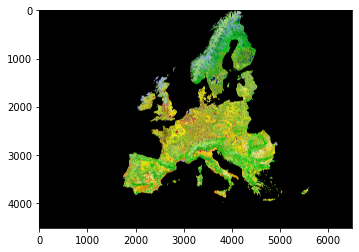

In [100]:
img = plt.imread(os.path.join(path, "output.tif"))
plt.imshow(img)